## Credit Card Fraud Detection


### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

### Loading dataset

In [2]:
df = pd.read_csv('Credit_card.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# SHAPE OF THE DATASET
df.shape

(284807, 31)

In [4]:
# DIMENSION OD THE DATASET
df.ndim

2

### Check for the missing values

In [5]:
df.isnull().sum()

# THERE ARE NO MISSING VALUES IN ANY OF THE COLUMN

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

###  5- point Summary for numerical variables

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* Time: Ranges from 0 to approximately 172,792, likely measured in seconds.
* V1 to V28: These features, likely resulting from a Principal Component Analysis (PCA), have mean values close to 0, which is expected after PCA and thrie Sts near to 1
* Most of the minimum is in negative,  minimum total amount and class is 0
* Amount: Min is 0 and maximum is 25691.160
* the 75th datapoint of amount and the max has a huge different which shows there is a positive outlier
* Class: More than 75% of the data in class variable is 0( non-fraud), max is 1 (fraud)

### Check the number of fraudulent transactions in the dataset 

In [9]:
Fraud_transaction =df['Class'].value_counts()
Fraud_transaction

0    284315
1       492
Name: Class, dtype: int64

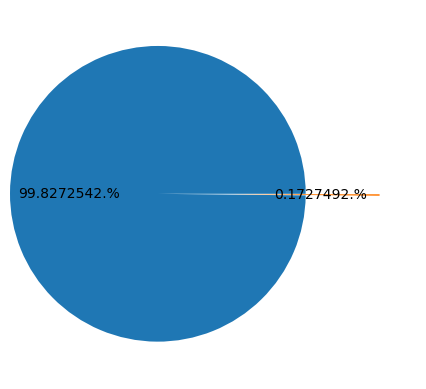

In [10]:
plt.pie(Fraud_transaction,autopct ='%f2.%%', explode=[0.50, 0.00])
plt.show()

* Ther are non fraud transactions -28431 and 492 fraud transactions

* pie chart shows

### Visualisation

### Univariate Analysis

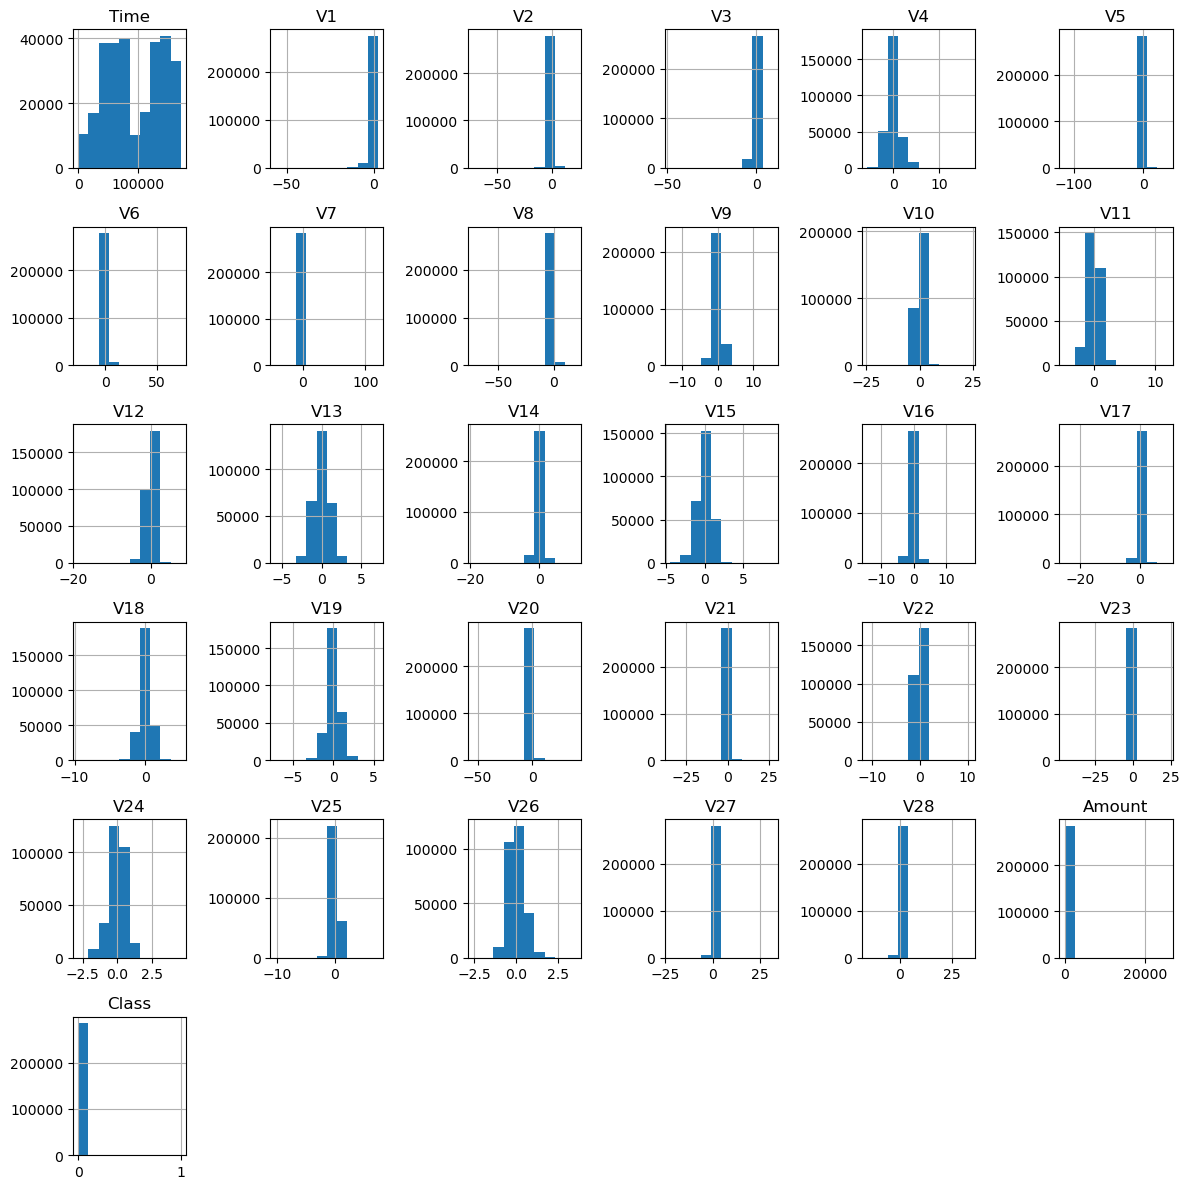

In [11]:
plt.rcParams['figure.figsize'] = [12,12]

dftemp = df.select_dtypes(include='number')
dftemp.hist()
plt.tight_layout()
plt.show()

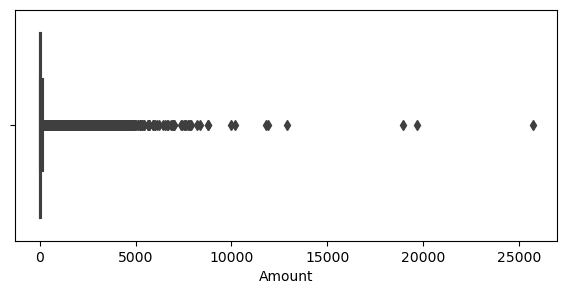

In [12]:
plt.figure(figsize = (7,3))
sns.boxplot(data = df, x = 'Amount')
plt.show()

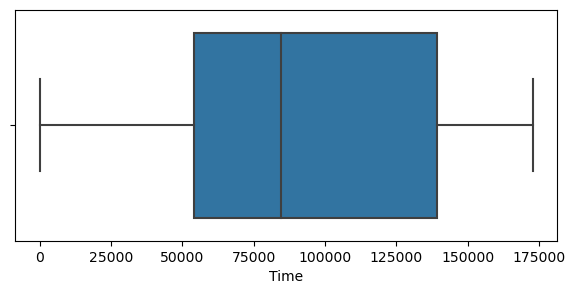

In [13]:
plt.figure(figsize = (7,3))
sns.boxplot(data = df, x = 'Time')
plt.show()

### Bivariate Analysis

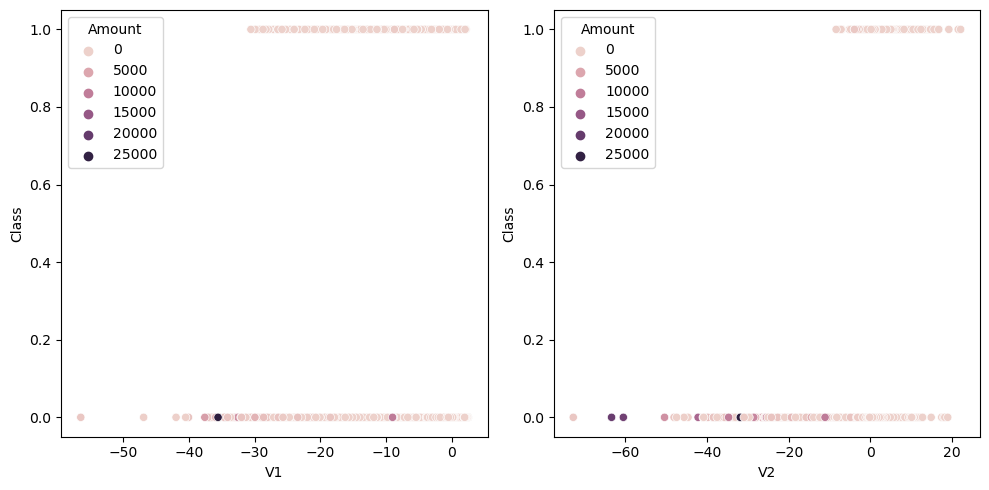

In [14]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df,x ="V1", y ="Class",hue="Amount")
plt.subplot(1,2,2)
sns.scatterplot(data = df,x ="V2", y ="Class",hue="Amount")
plt.tight_layout()
plt.show()

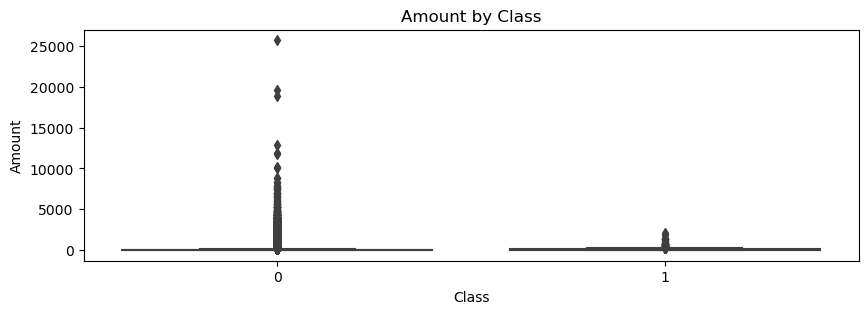

In [15]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount by Class")
plt.show()

### Multivariate Analysis

### Heatmap (Correlation)

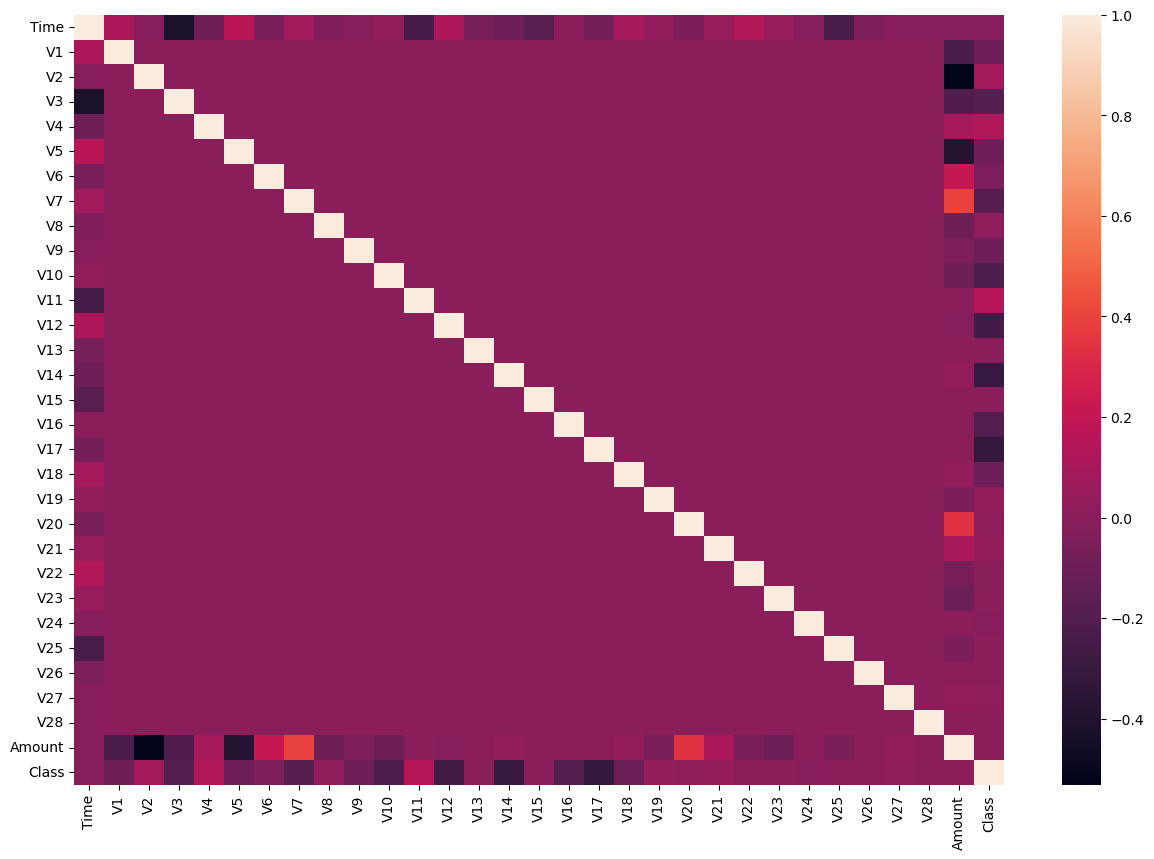

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False)
plt.show()

# These is no correlation between the features, as it is PCA features

* The correlation heatmap - relationships between different features in the dataset

* Most of the V1-V28 features, which are results of PCA, show little to no correlation with each other.
* The 'Class' variable shows varying degrees of correlation with some of the V features, which indicates
* that certain features might be more informative in distinguishing fraudulent transactions.
* The 'Time' and 'Amount' features do not exhibit strong correlations with the other features 

### Train Test Split

In [17]:
x = df.drop(['Class'],axis=1)
y = df['Class']

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.30, random_state=42)

In [19]:
print(xtrain.shape,xtest.shape)

(199364, 30) (85443, 30)


### Model Building

### LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score, accuracy_score, precision_score, recall_score

In [21]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred_lr_train=lr.predict(xtrain)
ypred_lr=lr.predict(xtest)

In [22]:
print(accuracy_score(ytrain,ypred_lr_train))
print(confusion_matrix(ytrain,ypred_lr_train))
print(classification_report(ytrain,ypred_lr_train))

0.9987109006641118
[[198903    105]
 [   152    204]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.66      0.57      0.61       356

    accuracy                           1.00    199364
   macro avg       0.83      0.79      0.81    199364
weighted avg       1.00      1.00      1.00    199364



* Here accuracy of model is more or less same on both training and testing data so we can say that our model is not over or under fitted

In [29]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

def per_measures(model,test,pred):
    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
    return (accuracy,recall,precision,f1score)

In [33]:
def update_performance (name, model, test,pred ):

    # assign 'comp_perf' as global variable
    global perf_score

    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]}, ignore_index = True)

In [34]:
update_performance(name="LogisticReg-Base",model=lr,test=ytest,pred=ypred_lr)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.998713,0.536765,0.608333,0.570312


### KNN model

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred_knn=knn.predict(xtest)

In [37]:
ypred_knn_trn=knn.predict(xtrain)
print(accuracy_score(ytrain,ypred_knn_trn))
print(confusion_matrix(ytrain,ypred_knn_trn))
print(classification_report(ytrain,ypred_knn_trn))

0.9983698160149275
[[199007      1]
 [   324     32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.97      0.09      0.16       356

    accuracy                           1.00    199364
   macro avg       0.98      0.54      0.58    199364
weighted avg       1.00      1.00      1.00    199364



In [38]:
update_performance(name="KNN",model=knn,test=ytest,pred=ypred_knn)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.998713,0.536765,0.608333,0.570312
1,KNN,0.998479,0.044118,1.000000,0.084507


### RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf_model = rf.fit(xtrain,ytrain)
ypred_rf = rf_model.predict(xtest)

In [40]:
ypred_knn_trn=knn.predict(xtrain)
print(accuracy_score(ytrain,ypred_knn_trn))
print(confusion_matrix(ytrain,ypred_knn_trn))
print(classification_report(ytrain,ypred_knn_trn))

0.9983698160149275
[[199007      1]
 [   324     32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.97      0.09      0.16       356

    accuracy                           1.00    199364
   macro avg       0.98      0.54      0.58    199364
weighted avg       1.00      1.00      1.00    199364



In [41]:
update_performance(name="Random Forest",model=rf_model,test=ytest,pred=ypred_rf)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.998713,0.536765,0.608333,0.570312
1,KNN,0.998479,0.044118,1.000000,0.084507
2,Random Forest,0.999590,0.801471,0.931624,0.861660


#### Conclusion:  Random Forest model is giiving teh best result , having the highest accuracy score, as we have PCA vairables, our score are high
